<a href="https://colab.research.google.com/github/noahbean33/PINN_experiments/blob/main/KAN_PINN_circuit_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for the RLC circuit
L = 1.0  # Inductance in Henry
R = 1.0  # Resistance in Ohm
C = 1.0  # Capacitance in Farad

# Define the neural network model
class KolmogorovArnoldNet(tf.keras.Model):
    def __init__(self, layers):
        super(KolmogorovArnoldNet, self).__init__()
        self.hidden_layers = [tf.keras.layers.Dense(layer, activation='tanh') for layer in layers[:-1]]
        self.output_layer = tf.keras.layers.Dense(layers[-1], activation='linear')

    def call(self, t):
        x = t
        for layer in self.hidden_layers:
            x = layer(x)
        return self.output_layer(x)

# Define the loss function
def loss_function(model, t, V_t):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(t)
        q = model(t)
        q_t = tape.gradient(q, t)
        q_tt = tape.gradient(q_t, t)

    # RLC differential equation: Lq_tt + Rq_t + q/C - V(t) = 0
    LHS = L * q_tt + R * q_t + q / C
    residual = LHS - V_t

    # Mean squared error of the residuals
    loss = tf.reduce_mean(tf.square(residual))
    return loss

# Training data
time = np.linspace(0, 10, 1000).reshape(-1, 1)
V_t = np.sin(time)  # Example input voltage

# Initialize the model
model = KolmogorovArnoldNet([50, 50, 1])

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Training loop
epochs = 1000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        loss = loss_function(model, time, V_t)

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.numpy()}')

# Plot the results
predicted_q = model(time).numpy()
plt.plot(time, predicted_q, label='Predicted Charge q(t)')
plt.xlabel('Time (s)')
plt.ylabel('Charge (C)')
plt.legend()
plt.show()


ValueError: Passed in object [[ 0.        ]
 [ 0.01001001]
 [ 0.02002002]
 [ 0.03003003]
 [ 0.04004004]
 [ 0.05005005]
 [ 0.06006006]
 [ 0.07007007]
 [ 0.08008008]
 [ 0.09009009]
 [ 0.1001001 ]
 [ 0.11011011]
 [ 0.12012012]
 [ 0.13013013]
 [ 0.14014014]
 [ 0.15015015]
 [ 0.16016016]
 [ 0.17017017]
 [ 0.18018018]
 [ 0.19019019]
 [ 0.2002002 ]
 [ 0.21021021]
 [ 0.22022022]
 [ 0.23023023]
 [ 0.24024024]
 [ 0.25025025]
 [ 0.26026026]
 [ 0.27027027]
 [ 0.28028028]
 [ 0.29029029]
 [ 0.3003003 ]
 [ 0.31031031]
 [ 0.32032032]
 [ 0.33033033]
 [ 0.34034034]
 [ 0.35035035]
 [ 0.36036036]
 [ 0.37037037]
 [ 0.38038038]
 [ 0.39039039]
 [ 0.4004004 ]
 [ 0.41041041]
 [ 0.42042042]
 [ 0.43043043]
 [ 0.44044044]
 [ 0.45045045]
 [ 0.46046046]
 [ 0.47047047]
 [ 0.48048048]
 [ 0.49049049]
 [ 0.5005005 ]
 [ 0.51051051]
 [ 0.52052052]
 [ 0.53053053]
 [ 0.54054054]
 [ 0.55055055]
 [ 0.56056056]
 [ 0.57057057]
 [ 0.58058058]
 [ 0.59059059]
 [ 0.6006006 ]
 [ 0.61061061]
 [ 0.62062062]
 [ 0.63063063]
 [ 0.64064064]
 [ 0.65065065]
 [ 0.66066066]
 [ 0.67067067]
 [ 0.68068068]
 [ 0.69069069]
 [ 0.7007007 ]
 [ 0.71071071]
 [ 0.72072072]
 [ 0.73073073]
 [ 0.74074074]
 [ 0.75075075]
 [ 0.76076076]
 [ 0.77077077]
 [ 0.78078078]
 [ 0.79079079]
 [ 0.8008008 ]
 [ 0.81081081]
 [ 0.82082082]
 [ 0.83083083]
 [ 0.84084084]
 [ 0.85085085]
 [ 0.86086086]
 [ 0.87087087]
 [ 0.88088088]
 [ 0.89089089]
 [ 0.9009009 ]
 [ 0.91091091]
 [ 0.92092092]
 [ 0.93093093]
 [ 0.94094094]
 [ 0.95095095]
 [ 0.96096096]
 [ 0.97097097]
 [ 0.98098098]
 [ 0.99099099]
 [ 1.001001  ]
 [ 1.01101101]
 [ 1.02102102]
 [ 1.03103103]
 [ 1.04104104]
 [ 1.05105105]
 [ 1.06106106]
 [ 1.07107107]
 [ 1.08108108]
 [ 1.09109109]
 [ 1.1011011 ]
 [ 1.11111111]
 [ 1.12112112]
 [ 1.13113113]
 [ 1.14114114]
 [ 1.15115115]
 [ 1.16116116]
 [ 1.17117117]
 [ 1.18118118]
 [ 1.19119119]
 [ 1.2012012 ]
 [ 1.21121121]
 [ 1.22122122]
 [ 1.23123123]
 [ 1.24124124]
 [ 1.25125125]
 [ 1.26126126]
 [ 1.27127127]
 [ 1.28128128]
 [ 1.29129129]
 [ 1.3013013 ]
 [ 1.31131131]
 [ 1.32132132]
 [ 1.33133133]
 [ 1.34134134]
 [ 1.35135135]
 [ 1.36136136]
 [ 1.37137137]
 [ 1.38138138]
 [ 1.39139139]
 [ 1.4014014 ]
 [ 1.41141141]
 [ 1.42142142]
 [ 1.43143143]
 [ 1.44144144]
 [ 1.45145145]
 [ 1.46146146]
 [ 1.47147147]
 [ 1.48148148]
 [ 1.49149149]
 [ 1.5015015 ]
 [ 1.51151151]
 [ 1.52152152]
 [ 1.53153153]
 [ 1.54154154]
 [ 1.55155155]
 [ 1.56156156]
 [ 1.57157157]
 [ 1.58158158]
 [ 1.59159159]
 [ 1.6016016 ]
 [ 1.61161161]
 [ 1.62162162]
 [ 1.63163163]
 [ 1.64164164]
 [ 1.65165165]
 [ 1.66166166]
 [ 1.67167167]
 [ 1.68168168]
 [ 1.69169169]
 [ 1.7017017 ]
 [ 1.71171171]
 [ 1.72172172]
 [ 1.73173173]
 [ 1.74174174]
 [ 1.75175175]
 [ 1.76176176]
 [ 1.77177177]
 [ 1.78178178]
 [ 1.79179179]
 [ 1.8018018 ]
 [ 1.81181181]
 [ 1.82182182]
 [ 1.83183183]
 [ 1.84184184]
 [ 1.85185185]
 [ 1.86186186]
 [ 1.87187187]
 [ 1.88188188]
 [ 1.89189189]
 [ 1.9019019 ]
 [ 1.91191191]
 [ 1.92192192]
 [ 1.93193193]
 [ 1.94194194]
 [ 1.95195195]
 [ 1.96196196]
 [ 1.97197197]
 [ 1.98198198]
 [ 1.99199199]
 [ 2.002002  ]
 [ 2.01201201]
 [ 2.02202202]
 [ 2.03203203]
 [ 2.04204204]
 [ 2.05205205]
 [ 2.06206206]
 [ 2.07207207]
 [ 2.08208208]
 [ 2.09209209]
 [ 2.1021021 ]
 [ 2.11211211]
 [ 2.12212212]
 [ 2.13213213]
 [ 2.14214214]
 [ 2.15215215]
 [ 2.16216216]
 [ 2.17217217]
 [ 2.18218218]
 [ 2.19219219]
 [ 2.2022022 ]
 [ 2.21221221]
 [ 2.22222222]
 [ 2.23223223]
 [ 2.24224224]
 [ 2.25225225]
 [ 2.26226226]
 [ 2.27227227]
 [ 2.28228228]
 [ 2.29229229]
 [ 2.3023023 ]
 [ 2.31231231]
 [ 2.32232232]
 [ 2.33233233]
 [ 2.34234234]
 [ 2.35235235]
 [ 2.36236236]
 [ 2.37237237]
 [ 2.38238238]
 [ 2.39239239]
 [ 2.4024024 ]
 [ 2.41241241]
 [ 2.42242242]
 [ 2.43243243]
 [ 2.44244244]
 [ 2.45245245]
 [ 2.46246246]
 [ 2.47247247]
 [ 2.48248248]
 [ 2.49249249]
 [ 2.5025025 ]
 [ 2.51251251]
 [ 2.52252252]
 [ 2.53253253]
 [ 2.54254254]
 [ 2.55255255]
 [ 2.56256256]
 [ 2.57257257]
 [ 2.58258258]
 [ 2.59259259]
 [ 2.6026026 ]
 [ 2.61261261]
 [ 2.62262262]
 [ 2.63263263]
 [ 2.64264264]
 [ 2.65265265]
 [ 2.66266266]
 [ 2.67267267]
 [ 2.68268268]
 [ 2.69269269]
 [ 2.7027027 ]
 [ 2.71271271]
 [ 2.72272272]
 [ 2.73273273]
 [ 2.74274274]
 [ 2.75275275]
 [ 2.76276276]
 [ 2.77277277]
 [ 2.78278278]
 [ 2.79279279]
 [ 2.8028028 ]
 [ 2.81281281]
 [ 2.82282282]
 [ 2.83283283]
 [ 2.84284284]
 [ 2.85285285]
 [ 2.86286286]
 [ 2.87287287]
 [ 2.88288288]
 [ 2.89289289]
 [ 2.9029029 ]
 [ 2.91291291]
 [ 2.92292292]
 [ 2.93293293]
 [ 2.94294294]
 [ 2.95295295]
 [ 2.96296296]
 [ 2.97297297]
 [ 2.98298298]
 [ 2.99299299]
 [ 3.003003  ]
 [ 3.01301301]
 [ 3.02302302]
 [ 3.03303303]
 [ 3.04304304]
 [ 3.05305305]
 [ 3.06306306]
 [ 3.07307307]
 [ 3.08308308]
 [ 3.09309309]
 [ 3.1031031 ]
 [ 3.11311311]
 [ 3.12312312]
 [ 3.13313313]
 [ 3.14314314]
 [ 3.15315315]
 [ 3.16316316]
 [ 3.17317317]
 [ 3.18318318]
 [ 3.19319319]
 [ 3.2032032 ]
 [ 3.21321321]
 [ 3.22322322]
 [ 3.23323323]
 [ 3.24324324]
 [ 3.25325325]
 [ 3.26326326]
 [ 3.27327327]
 [ 3.28328328]
 [ 3.29329329]
 [ 3.3033033 ]
 [ 3.31331331]
 [ 3.32332332]
 [ 3.33333333]
 [ 3.34334334]
 [ 3.35335335]
 [ 3.36336336]
 [ 3.37337337]
 [ 3.38338338]
 [ 3.39339339]
 [ 3.4034034 ]
 [ 3.41341341]
 [ 3.42342342]
 [ 3.43343343]
 [ 3.44344344]
 [ 3.45345345]
 [ 3.46346346]
 [ 3.47347347]
 [ 3.48348348]
 [ 3.49349349]
 [ 3.5035035 ]
 [ 3.51351351]
 [ 3.52352352]
 [ 3.53353353]
 [ 3.54354354]
 [ 3.55355355]
 [ 3.56356356]
 [ 3.57357357]
 [ 3.58358358]
 [ 3.59359359]
 [ 3.6036036 ]
 [ 3.61361361]
 [ 3.62362362]
 [ 3.63363363]
 [ 3.64364364]
 [ 3.65365365]
 [ 3.66366366]
 [ 3.67367367]
 [ 3.68368368]
 [ 3.69369369]
 [ 3.7037037 ]
 [ 3.71371371]
 [ 3.72372372]
 [ 3.73373373]
 [ 3.74374374]
 [ 3.75375375]
 [ 3.76376376]
 [ 3.77377377]
 [ 3.78378378]
 [ 3.79379379]
 [ 3.8038038 ]
 [ 3.81381381]
 [ 3.82382382]
 [ 3.83383383]
 [ 3.84384384]
 [ 3.85385385]
 [ 3.86386386]
 [ 3.87387387]
 [ 3.88388388]
 [ 3.89389389]
 [ 3.9039039 ]
 [ 3.91391391]
 [ 3.92392392]
 [ 3.93393393]
 [ 3.94394394]
 [ 3.95395395]
 [ 3.96396396]
 [ 3.97397397]
 [ 3.98398398]
 [ 3.99399399]
 [ 4.004004  ]
 [ 4.01401401]
 [ 4.02402402]
 [ 4.03403403]
 [ 4.04404404]
 [ 4.05405405]
 [ 4.06406406]
 [ 4.07407407]
 [ 4.08408408]
 [ 4.09409409]
 [ 4.1041041 ]
 [ 4.11411411]
 [ 4.12412412]
 [ 4.13413413]
 [ 4.14414414]
 [ 4.15415415]
 [ 4.16416416]
 [ 4.17417417]
 [ 4.18418418]
 [ 4.19419419]
 [ 4.2042042 ]
 [ 4.21421421]
 [ 4.22422422]
 [ 4.23423423]
 [ 4.24424424]
 [ 4.25425425]
 [ 4.26426426]
 [ 4.27427427]
 [ 4.28428428]
 [ 4.29429429]
 [ 4.3043043 ]
 [ 4.31431431]
 [ 4.32432432]
 [ 4.33433433]
 [ 4.34434434]
 [ 4.35435435]
 [ 4.36436436]
 [ 4.37437437]
 [ 4.38438438]
 [ 4.39439439]
 [ 4.4044044 ]
 [ 4.41441441]
 [ 4.42442442]
 [ 4.43443443]
 [ 4.44444444]
 [ 4.45445445]
 [ 4.46446446]
 [ 4.47447447]
 [ 4.48448448]
 [ 4.49449449]
 [ 4.5045045 ]
 [ 4.51451451]
 [ 4.52452452]
 [ 4.53453453]
 [ 4.54454454]
 [ 4.55455455]
 [ 4.56456456]
 [ 4.57457457]
 [ 4.58458458]
 [ 4.59459459]
 [ 4.6046046 ]
 [ 4.61461461]
 [ 4.62462462]
 [ 4.63463463]
 [ 4.64464464]
 [ 4.65465465]
 [ 4.66466466]
 [ 4.67467467]
 [ 4.68468468]
 [ 4.69469469]
 [ 4.7047047 ]
 [ 4.71471471]
 [ 4.72472472]
 [ 4.73473473]
 [ 4.74474474]
 [ 4.75475475]
 [ 4.76476476]
 [ 4.77477477]
 [ 4.78478478]
 [ 4.79479479]
 [ 4.8048048 ]
 [ 4.81481481]
 [ 4.82482482]
 [ 4.83483483]
 [ 4.84484484]
 [ 4.85485485]
 [ 4.86486486]
 [ 4.87487487]
 [ 4.88488488]
 [ 4.89489489]
 [ 4.9049049 ]
 [ 4.91491491]
 [ 4.92492492]
 [ 4.93493493]
 [ 4.94494494]
 [ 4.95495495]
 [ 4.96496496]
 [ 4.97497497]
 [ 4.98498498]
 [ 4.99499499]
 [ 5.00500501]
 [ 5.01501502]
 [ 5.02502503]
 [ 5.03503504]
 [ 5.04504505]
 [ 5.05505506]
 [ 5.06506507]
 [ 5.07507508]
 [ 5.08508509]
 [ 5.0950951 ]
 [ 5.10510511]
 [ 5.11511512]
 [ 5.12512513]
 [ 5.13513514]
 [ 5.14514515]
 [ 5.15515516]
 [ 5.16516517]
 [ 5.17517518]
 [ 5.18518519]
 [ 5.1951952 ]
 [ 5.20520521]
 [ 5.21521522]
 [ 5.22522523]
 [ 5.23523524]
 [ 5.24524525]
 [ 5.25525526]
 [ 5.26526527]
 [ 5.27527528]
 [ 5.28528529]
 [ 5.2952953 ]
 [ 5.30530531]
 [ 5.31531532]
 [ 5.32532533]
 [ 5.33533534]
 [ 5.34534535]
 [ 5.35535536]
 [ 5.36536537]
 [ 5.37537538]
 [ 5.38538539]
 [ 5.3953954 ]
 [ 5.40540541]
 [ 5.41541542]
 [ 5.42542543]
 [ 5.43543544]
 [ 5.44544545]
 [ 5.45545546]
 [ 5.46546547]
 [ 5.47547548]
 [ 5.48548549]
 [ 5.4954955 ]
 [ 5.50550551]
 [ 5.51551552]
 [ 5.52552553]
 [ 5.53553554]
 [ 5.54554555]
 [ 5.55555556]
 [ 5.56556557]
 [ 5.57557558]
 [ 5.58558559]
 [ 5.5955956 ]
 [ 5.60560561]
 [ 5.61561562]
 [ 5.62562563]
 [ 5.63563564]
 [ 5.64564565]
 [ 5.65565566]
 [ 5.66566567]
 [ 5.67567568]
 [ 5.68568569]
 [ 5.6956957 ]
 [ 5.70570571]
 [ 5.71571572]
 [ 5.72572573]
 [ 5.73573574]
 [ 5.74574575]
 [ 5.75575576]
 [ 5.76576577]
 [ 5.77577578]
 [ 5.78578579]
 [ 5.7957958 ]
 [ 5.80580581]
 [ 5.81581582]
 [ 5.82582583]
 [ 5.83583584]
 [ 5.84584585]
 [ 5.85585586]
 [ 5.86586587]
 [ 5.87587588]
 [ 5.88588589]
 [ 5.8958959 ]
 [ 5.90590591]
 [ 5.91591592]
 [ 5.92592593]
 [ 5.93593594]
 [ 5.94594595]
 [ 5.95595596]
 [ 5.96596597]
 [ 5.97597598]
 [ 5.98598599]
 [ 5.995996  ]
 [ 6.00600601]
 [ 6.01601602]
 [ 6.02602603]
 [ 6.03603604]
 [ 6.04604605]
 [ 6.05605606]
 [ 6.06606607]
 [ 6.07607608]
 [ 6.08608609]
 [ 6.0960961 ]
 [ 6.10610611]
 [ 6.11611612]
 [ 6.12612613]
 [ 6.13613614]
 [ 6.14614615]
 [ 6.15615616]
 [ 6.16616617]
 [ 6.17617618]
 [ 6.18618619]
 [ 6.1961962 ]
 [ 6.20620621]
 [ 6.21621622]
 [ 6.22622623]
 [ 6.23623624]
 [ 6.24624625]
 [ 6.25625626]
 [ 6.26626627]
 [ 6.27627628]
 [ 6.28628629]
 [ 6.2962963 ]
 [ 6.30630631]
 [ 6.31631632]
 [ 6.32632633]
 [ 6.33633634]
 [ 6.34634635]
 [ 6.35635636]
 [ 6.36636637]
 [ 6.37637638]
 [ 6.38638639]
 [ 6.3963964 ]
 [ 6.40640641]
 [ 6.41641642]
 [ 6.42642643]
 [ 6.43643644]
 [ 6.44644645]
 [ 6.45645646]
 [ 6.46646647]
 [ 6.47647648]
 [ 6.48648649]
 [ 6.4964965 ]
 [ 6.50650651]
 [ 6.51651652]
 [ 6.52652653]
 [ 6.53653654]
 [ 6.54654655]
 [ 6.55655656]
 [ 6.56656657]
 [ 6.57657658]
 [ 6.58658659]
 [ 6.5965966 ]
 [ 6.60660661]
 [ 6.61661662]
 [ 6.62662663]
 [ 6.63663664]
 [ 6.64664665]
 [ 6.65665666]
 [ 6.66666667]
 [ 6.67667668]
 [ 6.68668669]
 [ 6.6966967 ]
 [ 6.70670671]
 [ 6.71671672]
 [ 6.72672673]
 [ 6.73673674]
 [ 6.74674675]
 [ 6.75675676]
 [ 6.76676677]
 [ 6.77677678]
 [ 6.78678679]
 [ 6.7967968 ]
 [ 6.80680681]
 [ 6.81681682]
 [ 6.82682683]
 [ 6.83683684]
 [ 6.84684685]
 [ 6.85685686]
 [ 6.86686687]
 [ 6.87687688]
 [ 6.88688689]
 [ 6.8968969 ]
 [ 6.90690691]
 [ 6.91691692]
 [ 6.92692693]
 [ 6.93693694]
 [ 6.94694695]
 [ 6.95695696]
 [ 6.96696697]
 [ 6.97697698]
 [ 6.98698699]
 [ 6.996997  ]
 [ 7.00700701]
 [ 7.01701702]
 [ 7.02702703]
 [ 7.03703704]
 [ 7.04704705]
 [ 7.05705706]
 [ 7.06706707]
 [ 7.07707708]
 [ 7.08708709]
 [ 7.0970971 ]
 [ 7.10710711]
 [ 7.11711712]
 [ 7.12712713]
 [ 7.13713714]
 [ 7.14714715]
 [ 7.15715716]
 [ 7.16716717]
 [ 7.17717718]
 [ 7.18718719]
 [ 7.1971972 ]
 [ 7.20720721]
 [ 7.21721722]
 [ 7.22722723]
 [ 7.23723724]
 [ 7.24724725]
 [ 7.25725726]
 [ 7.26726727]
 [ 7.27727728]
 [ 7.28728729]
 [ 7.2972973 ]
 [ 7.30730731]
 [ 7.31731732]
 [ 7.32732733]
 [ 7.33733734]
 [ 7.34734735]
 [ 7.35735736]
 [ 7.36736737]
 [ 7.37737738]
 [ 7.38738739]
 [ 7.3973974 ]
 [ 7.40740741]
 [ 7.41741742]
 [ 7.42742743]
 [ 7.43743744]
 [ 7.44744745]
 [ 7.45745746]
 [ 7.46746747]
 [ 7.47747748]
 [ 7.48748749]
 [ 7.4974975 ]
 [ 7.50750751]
 [ 7.51751752]
 [ 7.52752753]
 [ 7.53753754]
 [ 7.54754755]
 [ 7.55755756]
 [ 7.56756757]
 [ 7.57757758]
 [ 7.58758759]
 [ 7.5975976 ]
 [ 7.60760761]
 [ 7.61761762]
 [ 7.62762763]
 [ 7.63763764]
 [ 7.64764765]
 [ 7.65765766]
 [ 7.66766767]
 [ 7.67767768]
 [ 7.68768769]
 [ 7.6976977 ]
 [ 7.70770771]
 [ 7.71771772]
 [ 7.72772773]
 [ 7.73773774]
 [ 7.74774775]
 [ 7.75775776]
 [ 7.76776777]
 [ 7.77777778]
 [ 7.78778779]
 [ 7.7977978 ]
 [ 7.80780781]
 [ 7.81781782]
 [ 7.82782783]
 [ 7.83783784]
 [ 7.84784785]
 [ 7.85785786]
 [ 7.86786787]
 [ 7.87787788]
 [ 7.88788789]
 [ 7.8978979 ]
 [ 7.90790791]
 [ 7.91791792]
 [ 7.92792793]
 [ 7.93793794]
 [ 7.94794795]
 [ 7.95795796]
 [ 7.96796797]
 [ 7.97797798]
 [ 7.98798799]
 [ 7.997998  ]
 [ 8.00800801]
 [ 8.01801802]
 [ 8.02802803]
 [ 8.03803804]
 [ 8.04804805]
 [ 8.05805806]
 [ 8.06806807]
 [ 8.07807808]
 [ 8.08808809]
 [ 8.0980981 ]
 [ 8.10810811]
 [ 8.11811812]
 [ 8.12812813]
 [ 8.13813814]
 [ 8.14814815]
 [ 8.15815816]
 [ 8.16816817]
 [ 8.17817818]
 [ 8.18818819]
 [ 8.1981982 ]
 [ 8.20820821]
 [ 8.21821822]
 [ 8.22822823]
 [ 8.23823824]
 [ 8.24824825]
 [ 8.25825826]
 [ 8.26826827]
 [ 8.27827828]
 [ 8.28828829]
 [ 8.2982983 ]
 [ 8.30830831]
 [ 8.31831832]
 [ 8.32832833]
 [ 8.33833834]
 [ 8.34834835]
 [ 8.35835836]
 [ 8.36836837]
 [ 8.37837838]
 [ 8.38838839]
 [ 8.3983984 ]
 [ 8.40840841]
 [ 8.41841842]
 [ 8.42842843]
 [ 8.43843844]
 [ 8.44844845]
 [ 8.45845846]
 [ 8.46846847]
 [ 8.47847848]
 [ 8.48848849]
 [ 8.4984985 ]
 [ 8.50850851]
 [ 8.51851852]
 [ 8.52852853]
 [ 8.53853854]
 [ 8.54854855]
 [ 8.55855856]
 [ 8.56856857]
 [ 8.57857858]
 [ 8.58858859]
 [ 8.5985986 ]
 [ 8.60860861]
 [ 8.61861862]
 [ 8.62862863]
 [ 8.63863864]
 [ 8.64864865]
 [ 8.65865866]
 [ 8.66866867]
 [ 8.67867868]
 [ 8.68868869]
 [ 8.6986987 ]
 [ 8.70870871]
 [ 8.71871872]
 [ 8.72872873]
 [ 8.73873874]
 [ 8.74874875]
 [ 8.75875876]
 [ 8.76876877]
 [ 8.77877878]
 [ 8.78878879]
 [ 8.7987988 ]
 [ 8.80880881]
 [ 8.81881882]
 [ 8.82882883]
 [ 8.83883884]
 [ 8.84884885]
 [ 8.85885886]
 [ 8.86886887]
 [ 8.87887888]
 [ 8.88888889]
 [ 8.8988989 ]
 [ 8.90890891]
 [ 8.91891892]
 [ 8.92892893]
 [ 8.93893894]
 [ 8.94894895]
 [ 8.95895896]
 [ 8.96896897]
 [ 8.97897898]
 [ 8.98898899]
 [ 8.998999  ]
 [ 9.00900901]
 [ 9.01901902]
 [ 9.02902903]
 [ 9.03903904]
 [ 9.04904905]
 [ 9.05905906]
 [ 9.06906907]
 [ 9.07907908]
 [ 9.08908909]
 [ 9.0990991 ]
 [ 9.10910911]
 [ 9.11911912]
 [ 9.12912913]
 [ 9.13913914]
 [ 9.14914915]
 [ 9.15915916]
 [ 9.16916917]
 [ 9.17917918]
 [ 9.18918919]
 [ 9.1991992 ]
 [ 9.20920921]
 [ 9.21921922]
 [ 9.22922923]
 [ 9.23923924]
 [ 9.24924925]
 [ 9.25925926]
 [ 9.26926927]
 [ 9.27927928]
 [ 9.28928929]
 [ 9.2992993 ]
 [ 9.30930931]
 [ 9.31931932]
 [ 9.32932933]
 [ 9.33933934]
 [ 9.34934935]
 [ 9.35935936]
 [ 9.36936937]
 [ 9.37937938]
 [ 9.38938939]
 [ 9.3993994 ]
 [ 9.40940941]
 [ 9.41941942]
 [ 9.42942943]
 [ 9.43943944]
 [ 9.44944945]
 [ 9.45945946]
 [ 9.46946947]
 [ 9.47947948]
 [ 9.48948949]
 [ 9.4994995 ]
 [ 9.50950951]
 [ 9.51951952]
 [ 9.52952953]
 [ 9.53953954]
 [ 9.54954955]
 [ 9.55955956]
 [ 9.56956957]
 [ 9.57957958]
 [ 9.58958959]
 [ 9.5995996 ]
 [ 9.60960961]
 [ 9.61961962]
 [ 9.62962963]
 [ 9.63963964]
 [ 9.64964965]
 [ 9.65965966]
 [ 9.66966967]
 [ 9.67967968]
 [ 9.68968969]
 [ 9.6996997 ]
 [ 9.70970971]
 [ 9.71971972]
 [ 9.72972973]
 [ 9.73973974]
 [ 9.74974975]
 [ 9.75975976]
 [ 9.76976977]
 [ 9.77977978]
 [ 9.78978979]
 [ 9.7997998 ]
 [ 9.80980981]
 [ 9.81981982]
 [ 9.82982983]
 [ 9.83983984]
 [ 9.84984985]
 [ 9.85985986]
 [ 9.86986987]
 [ 9.87987988]
 [ 9.88988989]
 [ 9.8998999 ]
 [ 9.90990991]
 [ 9.91991992]
 [ 9.92992993]
 [ 9.93993994]
 [ 9.94994995]
 [ 9.95995996]
 [ 9.96996997]
 [ 9.97997998]
 [ 9.98998999]
 [10.        ]] of type 'ndarray', not tf.Tensor or tf.Variable or ExtensionType.

Epoch 0, Loss: 2.345587968826294
Epoch 100, Loss: 0.42312440276145935
Epoch 200, Loss: 0.38390636444091797
Epoch 300, Loss: 0.3524169921875
Epoch 400, Loss: 0.336286723613739
Epoch 500, Loss: 0.32781603932380676
Epoch 600, Loss: 0.31374236941337585
Epoch 700, Loss: 0.26274967193603516
Epoch 800, Loss: 0.2167651355266571
Epoch 900, Loss: 0.1876915693283081


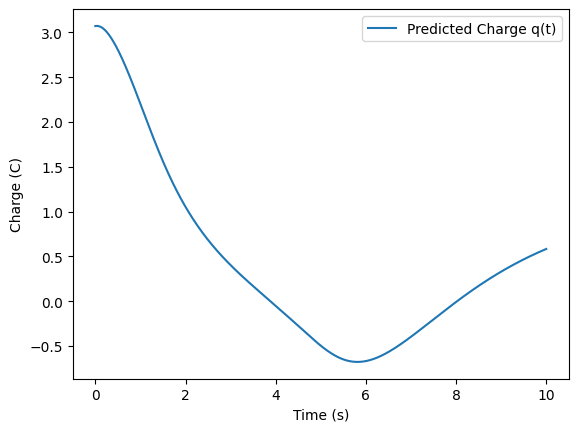

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for the RLC circuit
L = 1.0  # Inductance in Henry
R = 1.0  # Resistance in Ohm
C = 1.0  # Capacitance in Farad

# Define the neural network model
class KolmogorovArnoldNet(tf.keras.Model):
    def __init__(self, layers):
        super(KolmogorovArnoldNet, self).__init__()
        self.hidden_layers = [tf.keras.layers.Dense(layer, activation='tanh') for layer in layers[:-1]]
        self.output_layer = tf.keras.layers.Dense(layers[-1], activation='linear')

    def call(self, t):
        x = t
        for layer in self.hidden_layers:
            x = layer(x)
        return self.output_layer(x)

# Define the loss function
def loss_function(model, t, V_t):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(t)
        q = model(t)
        q_t = tape.gradient(q, t)
        q_tt = tape.gradient(q_t, t)

    # RLC differential equation: Lq_tt + Rq_t + q/C - V(t) = 0
    LHS = L * q_tt + R * q_t + q / C
    residual = LHS - V_t

    # Mean squared error of the residuals
    loss = tf.reduce_mean(tf.square(residual))
    return loss

# Training data
time = np.linspace(0, 10, 1000).reshape(-1, 1)
V_t = np.sin(time)  # Example input voltage

# Convert training data to TensorFlow tensors
time_tensor = tf.convert_to_tensor(time, dtype=tf.float32)
V_t_tensor = tf.convert_to_tensor(V_t, dtype=tf.float32)

# Initialize the model
model = KolmogorovArnoldNet([50, 50, 1])

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Training loop
epochs = 1000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        loss = loss_function(model, time_tensor, V_t_tensor)

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.numpy()}')

# Plot the results
predicted_q = model(time_tensor).numpy()
plt.plot(time, predicted_q, label='Predicted Charge q(t)')
plt.xlabel('Time (s)')
plt.ylabel('Charge (C)')
plt.legend()
plt.show()


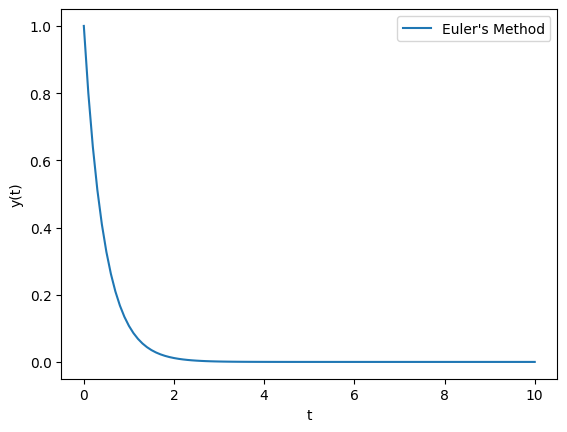

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the differential equation dy/dt = f(t, y)
def f(t, y):
    return -2 * y

# Initial condition
y0 = 1.0
t0 = 0.0

# Step size
h = 0.1

# Number of steps
num_steps = 100

# Arrays to store the solution
t_values = np.linspace(t0, t0 + num_steps * h, num_steps + 1)
y_values = np.zeros(num_steps + 1)

# Initial values
t_values[0] = t0
y_values[0] = y0

# Euler's method loop
for i in range(num_steps):
    y_values[i + 1] = y_values[i] + h * f(t_values[i], y_values[i])

# Plotting the solution
plt.plot(t_values, y_values, label='Euler\'s Method')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()


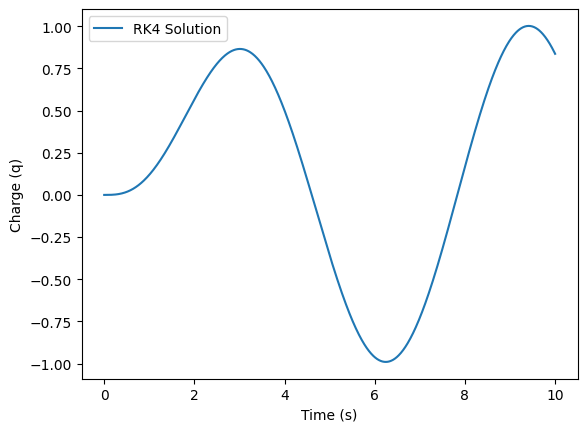

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the RLC circuit
L = 1.0  # Inductance in Henry
R = 1.0  # Resistance in Ohm
C = 1.0  # Capacitance in Farad

# Define the differential equations for the RLC circuit
def rlc_ode(t, y):
    q, i = y
    dqdt = i
    didt = (np.sin(t) - R*i - q/C) / L
    return np.array([dqdt, didt])

# Runge-Kutta 4th order method
def rk4_step(func, t, y, h):
    k1 = h * func(t, y)
    k2 = h * func(t + 0.5*h, y + 0.5*k1)
    k3 = h * func(t + 0.5*h, y + 0.5*k2)
    k4 = h * func(t + h, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

# Initial conditions
q0 = 0.0
i0 = 0.0
y0 = np.array([q0, i0])

# Time parameters
t0 = 0.0
tf = 10.0
h = 0.01
t_values = np.arange(t0, tf + h, h)

# Array to store the solution
solution_rk4 = np.zeros((len(t_values), 2))
solution_rk4[0] = y0

# Solving the ODE using RK4
for n in range(1, len(t_values)):
    solution_rk4[n] = rk4_step(rlc_ode, t_values[n-1], solution_rk4[n-1], h)

# Extracting the charge q from the solution
q_rk4 = solution_rk4[:, 0]

# Plotting the RK4 solution
plt.plot(t_values, q_rk4, label='RK4 Solution')
plt.xlabel('Time (s)')
plt.ylabel('Charge (q)')
plt.legend()
plt.show()


Epoch 0, Loss: 0.5131559371948242
Epoch 100, Loss: 0.34781932830810547
Epoch 200, Loss: 0.29474937915802
Epoch 300, Loss: 0.26506108045578003
Epoch 400, Loss: 0.16658437252044678
Epoch 500, Loss: 0.1028352826833725
Epoch 600, Loss: 0.058122631162405014
Epoch 700, Loss: 0.02600092627108097
Epoch 800, Loss: 0.009327320381999016
Epoch 900, Loss: 0.00491578783839941


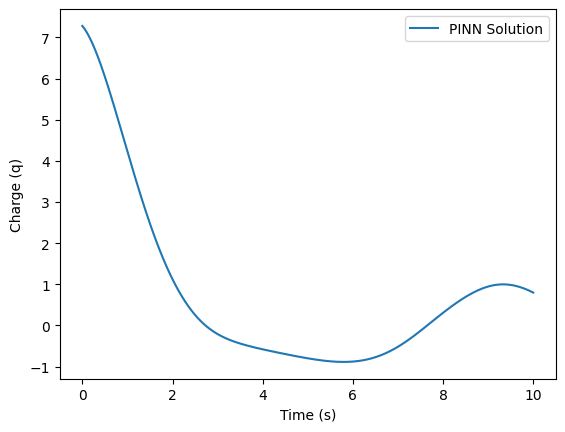

In [5]:
import tensorflow as tf

# Define the neural network model
class KolmogorovArnoldNet(tf.keras.Model):
    def __init__(self, layers):
        super(KolmogorovArnoldNet, self).__init__()
        self.hidden_layers = [tf.keras.layers.Dense(layer, activation='tanh') for layer in layers[:-1]]
        self.output_layer = tf.keras.layers.Dense(layers[-1], activation='linear')

    def call(self, t):
        x = t
        for layer in self.hidden_layers:
            x = layer(x)
        return self.output_layer(x)

# Define the loss function
def loss_function(model, t, V_t):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(t)
        q = model(t)
        q_t = tape.gradient(q, t)
        q_tt = tape.gradient(q_t, t)

    # RLC differential equation: Lq_tt + Rq_t + q/C - V(t) = 0
    LHS = L * q_tt + R * q_t + q / C
    residual = LHS - V_t

    # Mean squared error of the residuals
    loss = tf.reduce_mean(tf.square(residual))
    return loss

# Training data
time = np.linspace(0, 10, 1000).reshape(-1, 1)
V_t = np.sin(time)  # Example input voltage

# Convert training data to TensorFlow tensors
time_tensor = tf.convert_to_tensor(time, dtype=tf.float32)
V_t_tensor = tf.convert_to_tensor(V_t, dtype=tf.float32)

# Initialize the model
model = KolmogorovArnoldNet([50, 50, 1])

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Training loop
epochs = 1000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        loss = loss_function(model, time_tensor, V_t_tensor)

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.numpy()}')

# Extracting the predicted charge from the model
predicted_q = model(time_tensor).numpy()

# Plotting the PINN solution
plt.plot(time, predicted_q, label='PINN Solution')
plt.xlabel('Time (s)')
plt.ylabel('Charge (q)')
plt.legend()
plt.show()


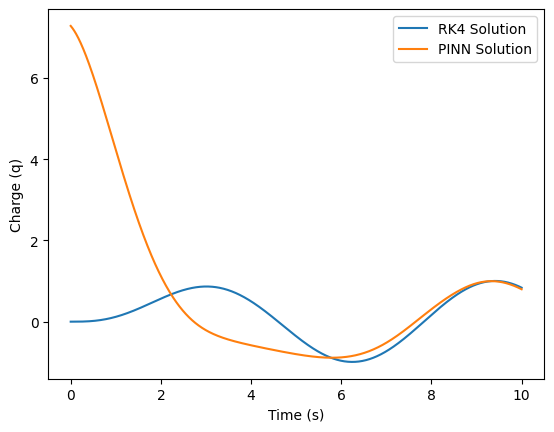

In [6]:
# Plotting the RK4 and PINN solutions for comparison
plt.plot(t_values, q_rk4, label='RK4 Solution')
plt.plot(time, predicted_q, label='PINN Solution')
plt.xlabel('Time (s)')
plt.ylabel('Charge (q)')
plt.legend()
plt.show()


Epoch 0, Loss: 0.8135895729064941
Epoch 100, Loss: 0.39590200781822205
Epoch 200, Loss: 0.3193657100200653
Epoch 300, Loss: 0.24580417573451996
Epoch 400, Loss: 0.16346481442451477
Epoch 500, Loss: 0.1066649779677391
Epoch 600, Loss: 0.07317338138818741
Epoch 700, Loss: 0.04967435076832771
Epoch 800, Loss: 0.030648304149508476
Epoch 900, Loss: 0.017521347850561142
Epoch 1000, Loss: 0.00982105266302824
Epoch 1100, Loss: 0.005170358810573816
Epoch 1200, Loss: 0.0024267619010061026
Epoch 1300, Loss: 0.0016756169497966766
Epoch 1400, Loss: 0.0013288111658766866
Epoch 1500, Loss: 0.0010718123521655798
Epoch 1600, Loss: 0.0008854316547513008
Epoch 1700, Loss: 0.0007520054350607097
Epoch 1800, Loss: 0.0006833981024101377
Epoch 1900, Loss: 0.0005876467330381274
Epoch 2000, Loss: 0.0005310091655701399
Epoch 2100, Loss: 0.00048479659017175436
Epoch 2200, Loss: 0.00044355529826134443
Epoch 2300, Loss: 0.00047410649131052196
Epoch 2400, Loss: 0.00037508420064114034
Epoch 2500, Loss: 0.000345478678

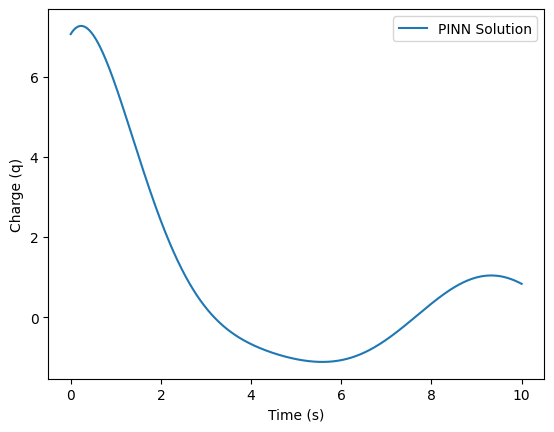

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the RLC circuit
L = 1.0  # Inductance in Henry
R = 1.0  # Resistance in Ohm
C = 1.0  # Capacitance in Farad

# Define the neural network model
class KolmogorovArnoldNet(tf.keras.Model):
    def __init__(self, layers):
        super(KolmogorovArnoldNet, self).__init__()
        self.hidden_layers = [tf.keras.layers.Dense(layer, activation='tanh') for layer in layers[:-1]]
        self.output_layer = tf.keras.layers.Dense(layers[-1], activation='linear')

    def call(self, t):
        x = t
        for layer in self.hidden_layers:
            x = layer(x)
        return self.output_layer(x)

# Define the loss function
def loss_function(model, t, V_t):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(t)
        q = model(t)
        q_t = tape.gradient(q, t)
        q_tt = tape.gradient(q_t, t)

    # RLC differential equation: Lq_tt + Rq_t + q/C - V(t) = 0
    LHS = L * q_tt + R * q_t + q / C
    residual = LHS - V_t

    # Mean squared error of the residuals
    loss = tf.reduce_mean(tf.square(residual))
    return loss

# Training data
time = np.linspace(0, 10, 1000).reshape(-1, 1)
V_t = np.sin(time)  # Example input voltage

# Convert training data to TensorFlow tensors
time_tensor = tf.convert_to_tensor(time, dtype=tf.float32)
V_t_tensor = tf.convert_to_tensor(V_t, dtype=tf.float32)

# Initialize the model
model = KolmogorovArnoldNet([50, 50, 1])

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Training loop with early stopping
epochs = 10000
patience = 200  # Number of epochs to wait for improvement before stopping
best_loss = np.inf
wait = 0

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        loss = loss_function(model, time_tensor, V_t_tensor)

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.numpy()}')

    # Early stopping
    if loss < best_loss:
        best_loss = loss
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print(f'Stopping early at epoch {epoch}, Loss: {loss.numpy()}')
            break

# Extracting the predicted charge from the model
predicted_q = model(time_tensor).numpy()

# Plotting the PINN solution
plt.plot(time, predicted_q, label='PINN Solution')
plt.xlabel('Time (s)')
plt.ylabel('Charge (q)')
plt.legend()
plt.show()


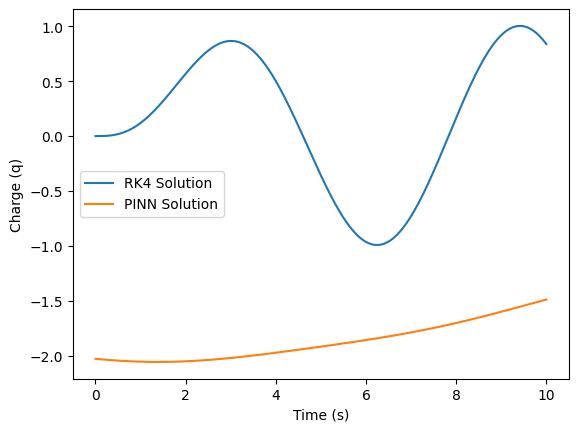

In [11]:
# Plotting the RK4 and PINN solutions for comparison
plt.plot(t_values, q_rk4, label='RK4 Solution')
plt.plot(time, predicted_q, label='PINN Solution')
plt.xlabel('Time (s)')
plt.ylabel('Charge (q)')
plt.legend()
plt.show()


In [8]:
# Normalize time and voltage data
time = np.linspace(0, 10, 1000).reshape(-1, 1)
V_t = np.sin(time)  # Example input voltage

time_min, time_max = np.min(time), np.max(time)
V_t_min, V_t_max = np.min(V_t), np.max(V_t)

time_normalized = (time - time_min) / (time_max - time_min)
V_t_normalized = (V_t - V_t_min) / (V_t_max - V_t_min)

time_tensor = tf.convert_to_tensor(time_normalized, dtype=tf.float32)
V_t_tensor = tf.convert_to_tensor(V_t_normalized, dtype=tf.float32)


Epoch 0, Loss: 0.8493798971176147
Epoch 100, Loss: 0.10595761239528656
Epoch 200, Loss: 0.07905718684196472
Epoch 300, Loss: 0.07814227789640427
Epoch 400, Loss: 0.07708706706762314
Epoch 500, Loss: 0.07566966116428375
Epoch 600, Loss: 0.07310879230499268
Epoch 700, Loss: 0.06435596942901611
Epoch 800, Loss: 0.024566741660237312
Epoch 900, Loss: 0.019322669133543968
Epoch 1000, Loss: 0.0101191820576787
Epoch 1100, Loss: 0.002232911065220833
Epoch 1200, Loss: 0.0010017361491918564
Epoch 1300, Loss: 0.0005621539312414825
Epoch 1400, Loss: 0.00033337806235067546
Epoch 1500, Loss: 0.00021482202282641083
Epoch 1600, Loss: 0.000156040521687828
Epoch 1700, Loss: 0.0001239330304088071
Epoch 1800, Loss: 0.00010054404265247285
Epoch 1900, Loss: 7.978150097187608e-05
Epoch 2000, Loss: 6.097697405493818e-05
Epoch 2100, Loss: 4.469697523745708e-05
Epoch 2200, Loss: 3.152341378154233e-05
Epoch 2300, Loss: 2.1479812858160585e-05
Epoch 2400, Loss: 1.449449518986512e-05
Epoch 2500, Loss: 9.419029993296

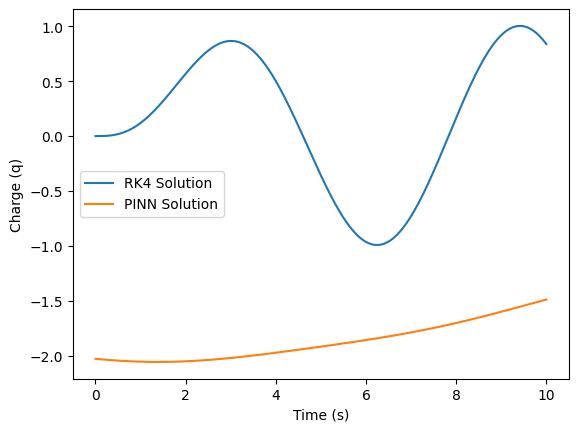

In [9]:
# Initialize the model
model = KolmogorovArnoldNet([50, 50, 1])

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Training loop with early stopping
epochs = 20000  # Increase the number of epochs
patience = 500  # Increase patience for early stopping
best_loss = np.inf
wait = 0

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        loss = loss_function(model, time_tensor, V_t_tensor)

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.numpy()}')

    # Early stopping
    if loss < best_loss:
        best_loss = loss
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print(f'Stopping early at epoch {epoch}, Loss: {loss.numpy()}')
            break

# Extracting the predicted charge from the model
predicted_q = model(time_tensor).numpy()

# Denormalize the predicted charge
predicted_q = predicted_q * (V_t_max - V_t_min) + V_t_min

# Plotting the RK4 and PINN solutions for comparison
plt.plot(t_values, q_rk4, label='RK4 Solution')
plt.plot(time, predicted_q, label='PINN Solution')
plt.xlabel('Time (s)')
plt.ylabel('Charge (q)')
plt.legend()
plt.show()


In [10]:
# Define the loss function
def loss_function(model, t, V_t):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(t)
        q = model(t)
        q_t = tape.gradient(q, t)
        q_tt = tape.gradient(q_t, t)

    # RLC differential equation: Lq_tt + Rq_t + q/C - V(t) = 0
    LHS = L * q_tt + R * q_t + q / C
    residual = LHS - V_t

    # Mean squared error of the residuals
    loss = tf.reduce_mean(tf.square(residual))
    return loss


In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the RLC circuit
L = 1.0  # Inductance in Henry
R = 1.0  # Resistance in Ohm
C = 1.0  # Capacitance in Farad

# Define the differential equations for the RLC circuit
def rlc_ode(t, y):
    q, i = y
    dqdt = i
    didt = (np.sin(t) - R * i - q / C) / L
    return np.array([dqdt, didt])

# Runge-Kutta 4th order method
def rk4_step(func, t, y, h):
    k1 = h * func(t, y)
    k2 = h * func(t + 0.5 * h, y + 0.5 * k1)
    k3 = h * func(t + 0.5 * h, y + 0.5 * k2)
    k4 = h * func(t + h, y + k3)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Initial conditions
q0 = 0.0
i0 = 0.0
y0 = np.array([q0, i0])

# Time parameters
t0 = 0.0
tf = 10.0
h = 0.01
t_values = np.arange(t0, tf + h, h)

# Array to store the solution
solution_rk4 = np.zeros((len(t_values), 2))
solution_rk4[0] = y0

# Solving the ODE using RK4
for n in range(1, len(t_values)):
    solution_rk4[n] = rk4_step(rlc_ode, t_values[n - 1], solution_rk4[n - 1], h)

# Extracting the charge q from the solution
q_rk4 = solution_rk4[:, 0]

# Normalize time and voltage data
time = np.linspace(0, 10, 1000).reshape(-1, 1)
V_t = np.sin(time)  # Example input voltage

time_min, time_max = np.min(time), np.max(time)
V_t_min, V_t_max = np.min(V_t), np.max(V_t)

time_normalized = (time - time_min) / (time_max - time_min)
V_t_normalized = (V_t - V_t_min) / (V_t_max - V_t_min)

# Convert to TensorFlow tensors
time_tensor = tf.convert_to_tensor(time_normalized, dtype=tf.float32)
V_t_tensor = tf.convert_to_tensor(V_t_normalized, dtype=tf.float32)

# Define the neural network model with a different architecture
class KolmogorovArnoldNet(tf.keras.Model):
    def __init__(self, layers):
        super(KolmogorovArnoldNet, self).__init__()
        self.hidden_layers = [tf.keras.layers.Dense(layer, activation='tanh') for layer in layers[:-1]]
        self.output_layer = tf.keras.layers.Dense(layers[-1], activation='linear')

    def call(self, t):
        x = t
        for layer in self.hidden_layers:
            x = layer(x)
        return self.output_layer(x)

# Initialize the model with a deeper and wider architecture
model = KolmogorovArnoldNet([100, 100, 100, 1])

# Define the loss function
def loss_function(model, t, V_t):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(t)
        q = model(t)
        q_t = tape.gradient(q, t)
        q_tt = tape.gradient(q_t, t)

    # RLC differential equation: Lq_tt + Rq_t + q/C - V(t) = 0
    LHS = L * q_tt + R * q_t + q / C
    residual = LHS - V_t

    # Mean squared error of the residuals
    loss = tf.reduce_mean(tf.square(residual))
    return loss

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Training loop with early stopping
epochs = 20000  # Increase the number of epochs
patience = 500  # Increase patience for early stopping
best_loss = np.inf
wait = 0

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        loss = loss_function(model, time_tensor, V_t_tensor)

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.numpy()}')

    # Early stopping
    if loss < best_loss:
        best_loss = loss
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print(f'Stopping early at epoch {epoch}, Loss: {loss.numpy()}')
            break

# Extracting the predicted charge from the model
predicted_q = model(time_tensor).numpy()

# Denormalize the predicted charge
predicted_q = predicted_q * (V_t_max - V_t_min) + V_t_min

# Plotting the RK4 and PINN solutions for comparison
plt.plot(t_values, q_rk4, label='RK4 Solution')
plt.plot(time, predicted_q, label='PINN Solution')
plt.xlabel('Time (s)')
plt.ylabel('Charge (q)')
plt.legend()
plt.show()


AttributeError: 'float' object has no attribute 'convert_to_tensor'